In [1]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


# libraries for text processing and handling text data
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer


from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from collections import Counter

# all the required models 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [2]:
# loading the dataset
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Email\completeSpamAssassin.csv')
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [3]:
#How big is data?
df.shape

(6046, 3)

In [4]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


Data cleaning

In [5]:
# Are there any missing values?
df.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [6]:
# Are there any duplicate values?
df.duplicated().sum()

0

In [7]:
# dropping null values
df.dropna(inplace=True)

Simple EDA

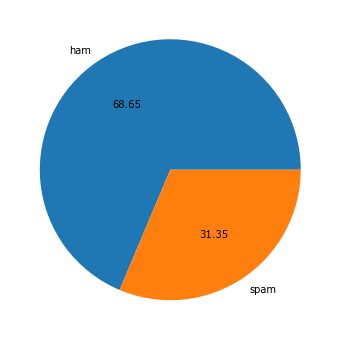

In [8]:
# Let's see the distribution of target variable
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

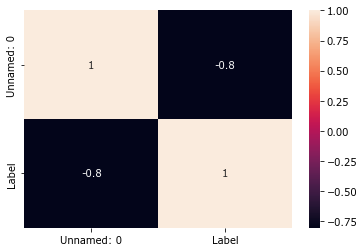

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

text processing

In [10]:
def text_preprocessing(text):
    if not isinstance(text, str):
        return str(text)  # Convert non-string types to string
    
    # convert text to lowercase
    text = text.lower()
    
    # creating list of words in email
    text = nltk.word_tokenize(text)
    
    # removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # copying processed text to text and clearing y to store next steps output
    text = y[:]
    y.clear()
    
    # removing stopwords and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # stemming 
    stemmer = SnowballStemmer('english')
    for i in text:
        y.append(stemmer.stem(i))
        
    return " ".join(y)


In [11]:
df['clean_text'] = df['Body'].apply(text_preprocessing)


In [12]:
# creating list of all the words in processed spam emails
spam_corpus = []
for mail in df[df['Label'] == 1]['clean_text'].tolist():
    for word in mail.split():
        spam_corpus.append(word)


In [13]:
# number of words in all spam mails
len(spam_corpus)

276886

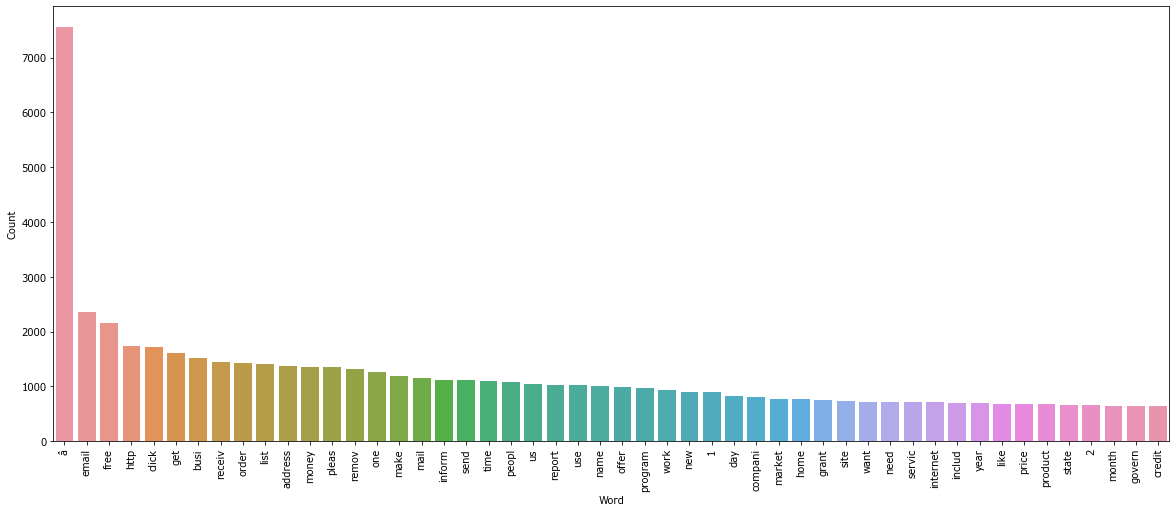

In [14]:
plt.figure(figsize=(20,8))
data = pd.DataFrame(Counter(spam_corpus).most_common(50), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()


In [15]:
# creating list of all the words in processed ham emails
ham_corpus = []
for mail in df[df['Label'] == 0]['clean_text'].tolist():
    for word in mail.split():
        ham_corpus.append(word)

# number of words in all ham mails
len(ham_corpus)

547669

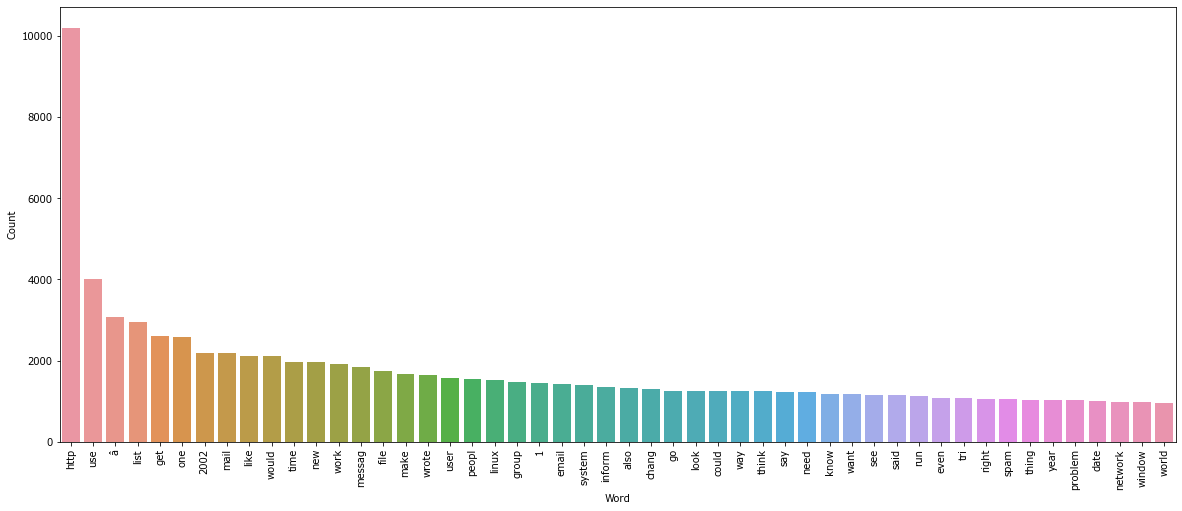

In [16]:
plt.figure(figsize=(20,8))
data = pd.DataFrame(Counter(ham_corpus).most_common(50), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()


In [17]:
#Changing text data in to numbers.

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=17000)

# Setting up features and target as x and y
x = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Label'].values

In [18]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Models

In [19]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Assuming x_train, x_test, y_train, y_test are defined
classifier = SVC()  # Or any other classifier you want to use

accuracy, precision = train_classifier(classifier, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.956989247311828
Precision: 0.9045226130653267


In [28]:
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'GaussianNB': GaussianNB(),  # Add GaussianNB here
    'KNeighbors': KNeighborsClassifier(),  # Add KNeighbors here
    'DecisionTree': DecisionTreeClassifier(),  # Add DecisionTree here
    
    
    # Add more classifiers as needed
}


In [29]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

accuracy_scores = []
precision_scores = []

# Training all the models on training data
for name, classifier in classifiers.items():
    current_accuracy, current_precision = train_classifier(classifier, x_train, y_train, x_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision, '\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVM
Accuracy -  0.956989247311828
Precision -  0.9045226130653267 

For  Random Forest
Accuracy -  0.9421009098428453
Precision -  0.88 

For  Logistic Regression
Accuracy -  0.9437551695616212
Precision -  0.8984375 

